In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
ratings = pd.read_csv(r"C:\Users\anshu\Downloads\ratings.csv")
movies = pd.read_csv(r"C:\Users\anshu\Downloads\movies.csv")

# Exploratory Data Analysis

In [3]:
print(movies.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [4]:
print(ratings.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [7]:
print(ratings.head())

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [8]:
n_ratings = len(ratings)
n_movies = len(ratings['movieId'].unique())
n_users = len(ratings['userId'].unique())
 
print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 100836
Number of unique movieId's: 9724
Number of unique users: 610
Average ratings per user: 165.3
Average ratings per movie: 10.37


In [9]:
n_ratings = len(ratings)
n_movies = len(ratings['movieId'].unique())
n_users = len(ratings['userId'].unique())

In [10]:
ratings['year'] = pd.to_datetime(ratings['timestamp'], unit='s').dt.year

most_watched_per_year = ratings.groupby(['year', 'movieId']).size().reset_index(name='count')
most_watched_movies_per_year = most_watched_per_year.loc[most_watched_per_year.groupby('year')['count'].idxmax()]
most_watched_movies_per_year = pd.merge(most_watched_movies_per_year, movies, on='movieId')

print(most_watched_movies_per_year[['year', 'title', 'count']])

    year                                              title  count
0   1996                                      Batman (1989)     83
1   1997               Independence Day (a.k.a. ID4) (1996)     27
2   1998                                      Scream (1996)      6
3   1999                         Saving Private Ryan (1998)     15
4   2000          Star Wars: Episode IV - A New Hope (1977)     31
5   2001  Crouching Tiger, Hidden Dragon (Wo hu cang lon...     14
6   2002  Lord of the Rings: The Fellowship of the Ring,...     13
7   2003      Lord of the Rings: The Two Towers, The (2002)     18
8   2006      Lord of the Rings: The Two Towers, The (2002)     18
9   2004  Lord of the Rings: The Return of the King, The...     12
10  2005                            Sixth Sense, The (1999)     15
11  2007                               Departed, The (2006)     19
12  2008                                        Juno (2007)     17
13  2009                                   Star Trek (2009)   

In [11]:
least_watched_movies_per_year = most_watched_per_year.loc[most_watched_per_year.groupby('year')['count'].idxmin()]

least_watched_movies_per_year = pd.merge(least_watched_movies_per_year, movies, on='movieId')

print(least_watched_movies_per_year[['year', 'title', 'count']])


    year                               title  count
0   1996  Dracula: Dead and Loving It (1995)      1
1   1997                      Jumanji (1995)      1
2   1999                      Jumanji (1995)      1
3   2011                      Jumanji (1995)      1
4   1998                    Toy Story (1995)      1
5   2000                 Tom and Huck (1995)      1
6   2001  Father of the Bride Part II (1995)      1
7   2003  Father of the Bride Part II (1995)      1
8   2004  Father of the Bride Part II (1995)      1
9   2005  Father of the Bride Part II (1995)      1
10  2006  Father of the Bride Part II (1995)      1
11  2013  Father of the Bride Part II (1995)      1
12  2018  Father of the Bride Part II (1995)      1
13  2002             Grumpier Old Men (1995)      1
14  2008             Grumpier Old Men (1995)      1
15  2010             Grumpier Old Men (1995)      1
16  2012             Grumpier Old Men (1995)      1
17  2015             Grumpier Old Men (1995)      1
18  2017    

In [12]:
movie_watch_counts = ratings['movieId'].value_counts()

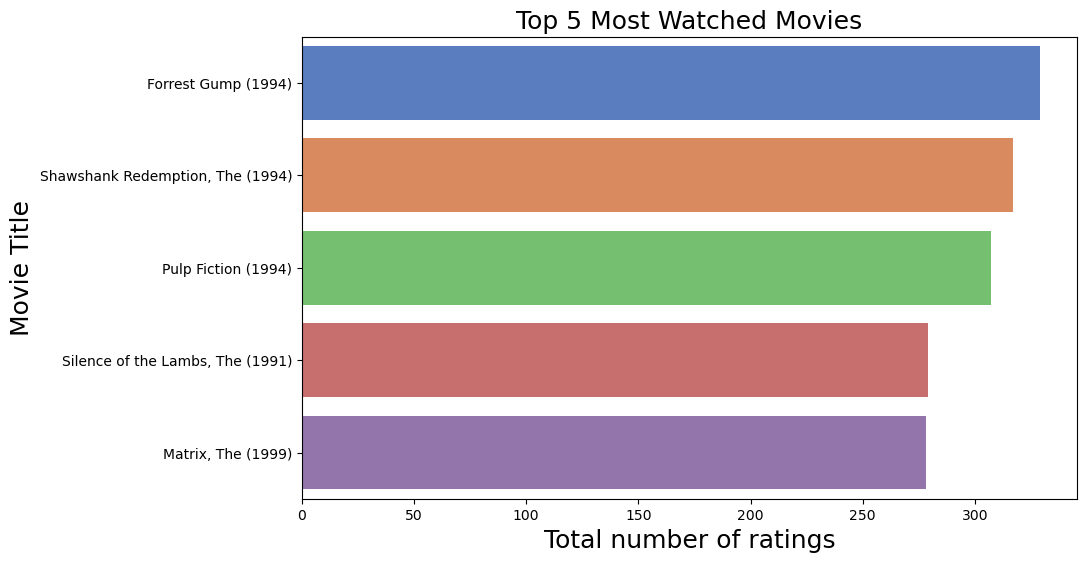

In [26]:
# top 5 watched movies per ratings

top_watched_movies = pd.merge(movie_watch_counts, movies, left_index=True, right_on='movieId')
top_watched_movies = top_watched_movies.sort_values(by='movieId_x', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='movieId_x', y='title', data=top_watched_movies, palette='muted')
plt.title('Top 5 Most Watched Movies',fontsize=18 )
plt.xlabel('Total number of ratings',fontsize=18 )
plt.ylabel('Movie Title',fontsize=18 )
plt.show()

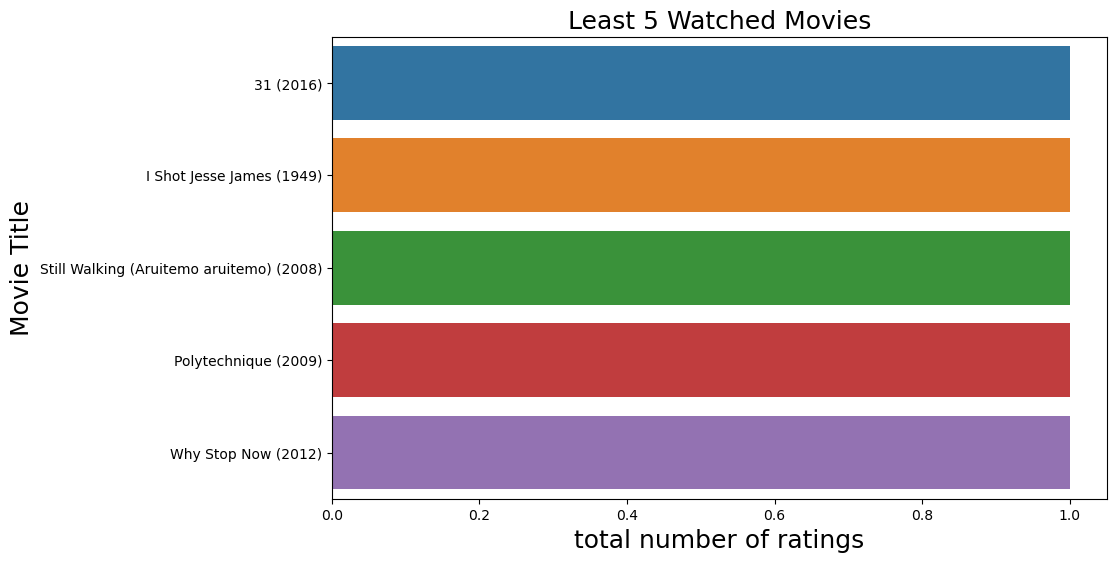

In [14]:
# least 5 watched movies

least_watched_movies = pd.merge(movie_watch_counts, movies, left_index=True, right_on='movieId')
least_watched_movies = least_watched_movies.sort_values(by='movieId_x', ascending=True).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='movieId_x', y='title', data=least_watched_movies)
plt.title('Least 5 Watched Movies',fontsize=18 )
plt.xlabel('total number of ratings',fontsize=18 )
plt.ylabel('Movie Title', fontsize=18 )
plt.show()


In [15]:
genres_df = movies['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
genres_df = pd.DataFrame(genres_df)
genre_counts = genres_df['genre'].value_counts()


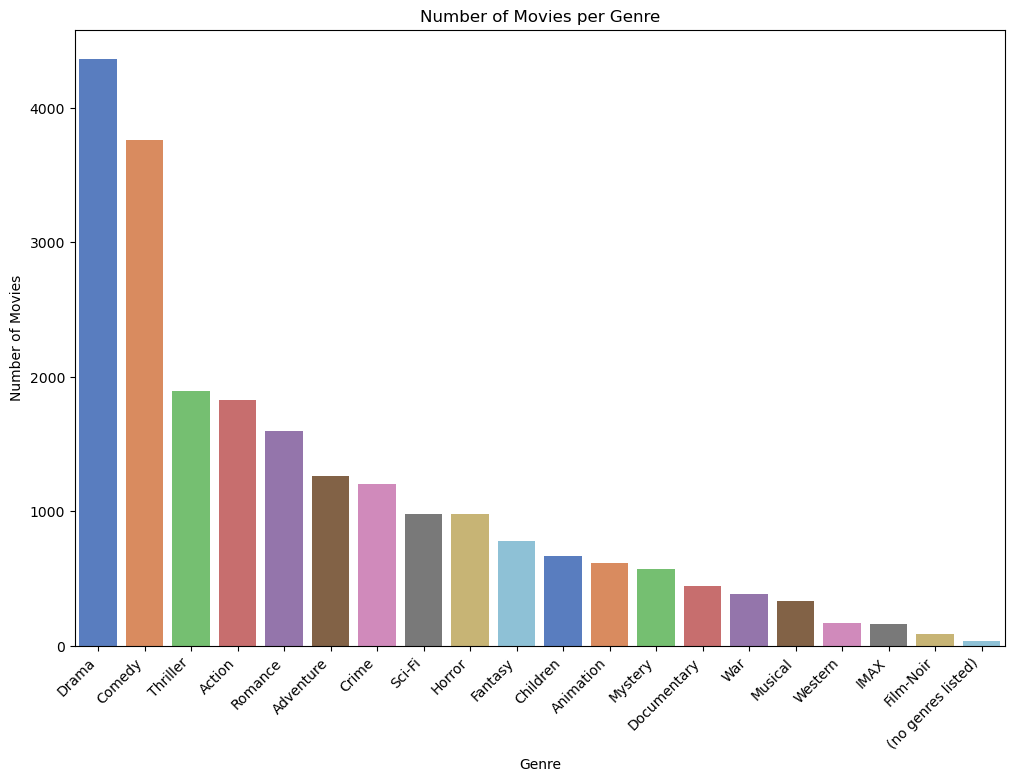

In [16]:
# Number of movies per genre

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='muted')
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

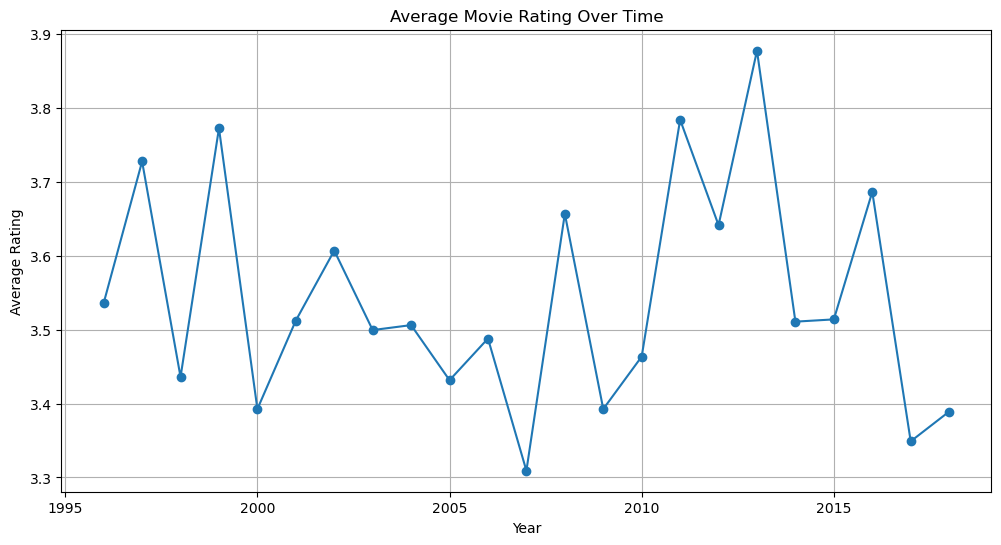

In [17]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year'] = ratings['timestamp'].dt.year
average_rating_by_year = ratings.groupby('year')['rating'].mean()

plt.figure(figsize=(12, 6))
plt.plot(average_rating_by_year.index, average_rating_by_year.values, marker='o', linestyle='-')
plt.title('Average Movie Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

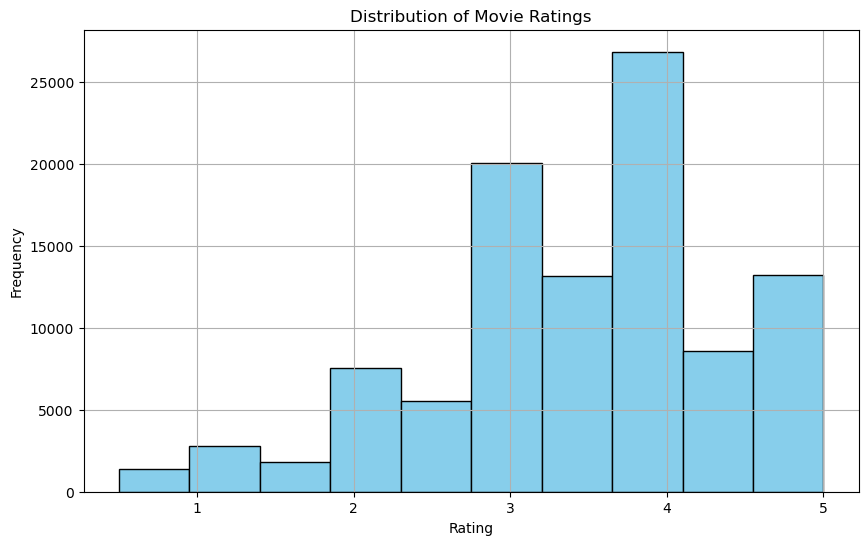

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(ratings['rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

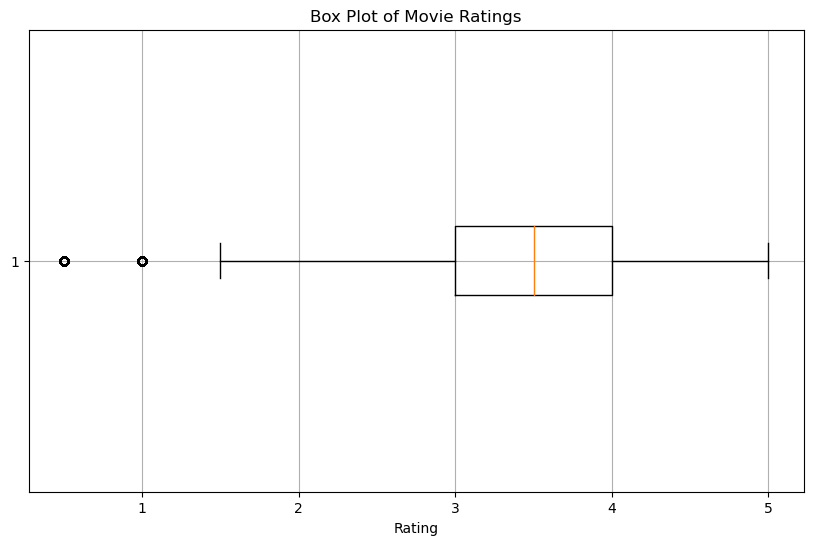

In [19]:
plt.figure(figsize=(10, 6))
plt.boxplot(ratings['rating'], vert=False)
plt.title('Box Plot of Movie Ratings')
plt.xlabel('Rating')
plt.grid(True)
plt.show()

In [20]:
movie_stats = ratings.groupby('movieId')[['rating']].agg(['count', 'mean'])
movie_stats.columns = movie_stats.columns.droplevel()

In [21]:
def create_matrix(df):
     
    N = len(df['userId'].unique())
    M = len(df['movieId'].unique())
     
    # Map Ids to indices
    user_mapper = dict(zip(np.unique(df["userId"]), list(range(N))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(M))))
     
    # Map indices to IDs
    user_inv_mapper = dict(zip(list(range(N)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(M)), np.unique(df["movieId"])))
     
    user_index = [user_mapper[i] for i in df['userId']]
    movie_index = [movie_mapper[i] for i in df['movieId']]
 
    X = csr_matrix((df["rating"], (movie_index, user_index)), shape=(M, N))
     
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper
     
X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_matrix(ratings)

In [22]:
def find_similar_movies(movie_id, X, k, metric='cosine', show_distance=False):
     
    neighbour_ids = []
     
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    k+=1
    kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
    kNN.fit(X)
    movie_vec = movie_vec.reshape(1,-1)
    neighbour = kNN.kneighbors(movie_vec, return_distance=show_distance)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [23]:
movie_titles = dict(zip(movies['movieId'], movies['title']))
 
movie_id = 3
 
similar_ids = find_similar_movies(movie_id, X, k=10)
movie_title = movie_titles[movie_id]
 
print(f"Since you watched {movie_title}")
for i in similar_ids:
    print(movie_titles[i])

Since you watched Grumpier Old Men (1995)
Grumpy Old Men (1993)
Striptease (1996)
Nutty Professor, The (1996)
Twister (1996)
Father of the Bride Part II (1995)
Broken Arrow (1996)
Bio-Dome (1996)
Truth About Cats & Dogs, The (1996)
Sabrina (1995)
Birdcage, The (1996)


In [24]:
def recommend_movies_for_user(user_id, X, user_mapper, movie_mapper, movie_inv_mapper, k=10):
    df1 = ratings[ratings['userId'] == user_id]
     
    if df1.empty:
        print(f"User with ID {user_id} does not exist.")
        return
 
    movie_id = df1[df1['rating'] == max(df1['rating'])]['movieId'].iloc[0]
 
    movie_titles = dict(zip(movies['movieId'], movies['title']))
 
    similar_ids = find_similar_movies(movie_id, X, k)
    movie_title = movie_titles.get(movie_id, "Movie not found")
 
    if movie_title == "Movie not found":
        print(f"Movie with ID {movie_id} not found.")
        return
 
    print(f"Since you watched {movie_title}, you might also like:")
    for i in similar_ids:
        print(movie_titles.get(i, "Movie not found"))

In [31]:
#User can input the User_id here and get the recommendations accordingly

user_id = input("Enter your user ID: ")
user_id = int(user_id)
recommend_movies_for_user(user_id, X, user_mapper, movie_mapper, movie_inv_mapper, k=10)

Enter your user ID: 234
Since you watched Toy Story (1995), you might also like:
Toy Story 2 (1999)
Jurassic Park (1993)
Independence Day (a.k.a. ID4) (1996)
Star Wars: Episode IV - A New Hope (1977)
Forrest Gump (1994)
Lion King, The (1994)
Star Wars: Episode VI - Return of the Jedi (1983)
Mission: Impossible (1996)
Groundhog Day (1993)
Back to the Future (1985)
